# Notebook 9 - GANs pour la génération de chiffres MNIST

CSI4506 Intelligence Artificielle   
Automne 2021  
Version 1 (2020) preparée par Julian Templeton, Caroline Barrière et Joel Muteba.  Version 2 (2021) mise à jour par Caroline Barrière.

***INTRODUCTION (Lisez ceci attentivement!)***:

Avec la résurgence de l'apprentissage profond (Deep Learning) et des architectures d'apprentissage profond (Deep Learning Architectures, DLA) en raison de la puissance accrue de l'informatique moderne, il existe une multitude de façons dont les DLAs peuvent être utilisés pour s'attaquer à pratiquement tous les types de problèmes (la reconnaissance faciale, les prévisions boursières, la génération d'images, ...).

L'IA générative, avec sa génération de fausses images, vidéos, musique et textes (ex: poèmes), est un sujet d'intérêt dans la société. L'IA générative peut avoir des applications pratiques, pensons par exemple à l'illustration automatique de textes pour l'apprentissage, mais cette IA peut également avoir des implications éthiques importantes. 

D'un point de vue technologique, l'IA générative, telle que possible à l'aide de DLAs, peut être facilement implémentée grâce à l'utilisation de bibliothèques Python Deep Learning telles que [PyTorch](https://pytorch.org/), [TensorFlow](https://www.tensorflow.org/) et [Keras](https://keras.io/). Cela dit, bien qu'il soit possible de trouver de nombreux exemples d'utilisation de ces DLAs, ils nécessitent toujours une immense puissance de calcul pour fournir des résultats de façon efficace, et comme vous pourrez le constater dans ce Notebook, ils peuvent donner des résultats variables s'il n'y a pas un effort notable de "fine-tuning" d'hyperparamètres (ce qui peut prendre beaucoup de temps).

Dans ce notebook, nous explorerons une tâche commune de génération d'images grâce à l'utilisation d'un réseau antagoniste génératif (GAN). En commençant par des images générées aléatoirement comme celle-ci    


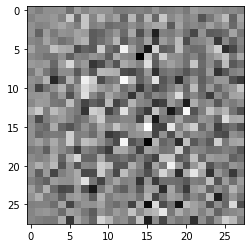     

le GAN apprendra à générer des images de chiffres comme celle-ci (dans cette image, ce chiffre est '1')

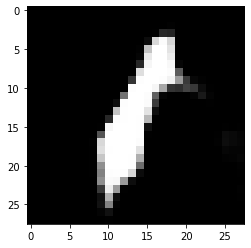



Il existe de nombreux types de GAN, chacun avec des avantages et des inconvénients différents. Dans ce notebook, nous travaillerons avec un DCGAN (Deep Convolutional GAN). Un DCGAN est similaire à un GAN, mais introduit des couches convolutives dans son réseau pour augmenter les performances. Les couches convolutives sont couramment utilisées dans les réseaux de neurones convolutifs, ainsi le DCGAN utilisera ce type de couches dans le design du générateur et du discriminateur. Pour passer en revue ces concepts, vous pouvez regarder la vidéo facultative dans le module 6 sur Brightspace pour en savoir plus sur les couches convolutives dans les réseaux de neurones convolutifs (CNN).

Comme évoqué ci-dessus, les DLAs tels que les GAN nécessitent un immense traitement de calcul. Cela nécessite généralement une carte graphique haut de gamme, comme les dernières cartes de NVIDIA (qui fournissent des outils, tels que [CUDA](https://developer.nvidia.com/cuda-zone) pour permettre l'exécution du code sur le GPU pour un traitement rapide). Étant donné que nous ne pouvons pas nous attendre à ce que vous ayez une carte graphique ou que vous passiez le temps à attendre qu'un processeur effectue les calculs, nous utiliserons un environnement Jupyter gratuit basé sur le cloud fourni par Google. [Google Colab](https://colab.research.google.com/) est un environnement jupyter gratuit basé sur le cloud, idéal pour effectuer des expériences d'apprentissage profond, car il permet d'accéder à des cartes graphiques très puissantes (qui ont limites, mais celles-ci ne devraient pas se produire pendant la durée de ce notebook). Ces limites incluent les contraintes de temps et les limitations de mémoire qui peuvent se produire si nous exécutons un algorithme d'entraînement pendant trop d'époques ou si nous concevons un modèle qui a trop de nœuds cachés. 

L'environnement colab est prévu pour des usages interactifs, ainsi, attention de ne pas laisser votre notebook "idle" trop longtemps, car cela pourrait mener à des coupures d'accès aux GPUs.

Beaucoup d'entre vous sont déjà passés à Colab pour l'exécution des notebooks précédents, peut-être en raison de problèmes d'installation sur votre ordinateur personnel. Si vous avez déjà changé, vous savez déjà comment utiliser Colab. Si vous n'avez pas encore changé, vous devez absolument utiliser Colab pour ce notebook, à moins que vous n'ayez vos propres GPU à la maison.

Contrairement aux notebooks précédents, ce notebook se concentrera sur l'exploration d'idées et l'analyse des résultats car il serait au-delà de la portée de notre cours d'introduction d'apprendre une nouvelle bibliothèque complexe et de programmer un modèle complexe d'apprentissage profond avec elle.

Ce notebook est basé sur [l'exemple officiel de TensorFlow de création d'un DCGAN](https://www.tensorflow.org/tutorials/generative/dcgan). Le code utilisé ici est inspiré de l'exemple et adapté pour optimiser les performances et fonctionner dans Google Colab. Ainsi, notez que le code utilisé ici provient de cet exemple avec des modifications si nécessaire.

**Lors de la soumission de ce notebook, assurez-vous de NE PAS réinitialiser les sorties de l'exécution du code (et n'oubliez pas de sauvegarder le notebook avec ctrl + s).**

***DEVOIR***:

Parcourez le notebook en exécutant chaque cellule, une à la fois. \

Recherchez **(TO DO)** pour les tâches que vous devez effectuer. Ne modifiez pas le code en dehors des questions auxquelles vous êtes invité à répondre à moins que cela ne vous soit spécifiquement demandé. Une fois que vous avez terminé, signez le notebook (à la fin du notebook), renommez-le *NumEtudiant-NomFamille-Notebook9.ipynb* et soumettez-le.

*Le notebook sera noté le 25.  \
Chaque **(TO DO)** a un certain nombre de points qui lui sont associés.*
***

**1.0 - Configuration de l'environnement Google Colab**

Avant d'entrer directement dans le code, nous devons d'abord configurer notre environnement Google Colab. Pour ce faire, nous devrons installer certaines bibliothèques avec pip (nous devrons le faire chaque fois que nous exécutons le notebook), nous devrons importer certaines bibliothèques et nous devrons enfin activer l'accès GPU pour ce notebook dans Google Colab.

Nous allons d'abord initialiser l'accès GPU pour le notebook. Google vous demandera de l'éteindre lorsqu'il n'est pas utilisé, mais vous pourrez facilement compléter le notebook sans problème. Il existe certaines limitations sur la durée de fonctionnement consécutif (plusieurs heures) et la mémoire totale pouvant être utilisée (environ 12 Go selon la carte allouée), mais ce ne sera pas un problème pour ce notebook. De plus, Google peut attribuer différents GPU à chaque utilisateur. Cela peut signifier que vous obtenez une carte légèrement plus lente ou plus rapide, mais tous les GPUs seront plus que suffisants pour exécuter ces modèles avancés avec facilité. Si un problème lié au GPU se produit, vous devrez redémarrer le notebook ou vous déconnecter/vous reconnecter à un nouveau GPU après quelques minutes. Assurez-vous aussi de fermer votre session lorsque vous avez terminé (allez dans *Exécution* et *Gérer les sessions*).

**Pour vous connecter à un GPU, allez dans *Modifier(Edit)* dans la barre d'outils, sélectionnez *Paramètres du notebook(Notebook Settings)*, sélectionnez *GPU* comme accélérateur matériel, puis cliquez sur *Enregistrer*.**

Ensuite, exécutez les installations pip suivantes et les fonctions d'importation pour configurer TensorFlow et toutes les autres bibliothèques que nous utiliserons. Notez que plusieurs bibliothèques que nous avons utilisées dans les notebooks précédents reviennent pour résoudre ce problème.

In [ ]:
# Install the specified libraries
!pip install -q imageio
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
# Import TensorFlow (note that this also will provide us with the MNIST dataset thanks to Keras)
import tensorflow as tf
import tensorflow_docs.vis.embed as embed
from tensorflow.keras import layers

# Install additional libraries to help define our arrays, images, and more
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import time
from IPython import display


**2.0 - Importation de l'ensemble de données**

Maintenant que l'environnement est prêt, nous allons charger l'ensemble de données MNIST qui nous est fourni par les ensembles de données standard dans TensorFlow. L'ensemble de données MNIST est un ensemble de données composé d'images de chiffres manuscrits (0, 1, 2, ..., 9). Ci-dessous, nous chargeons les données qui nous serviront d'ensemble d'apprentissage (rappelons que nous n'avons pas d'ensemble de test puisque le GAN s'entraînera continuellement pour s'améliorer, contrairement à la classification des chiffres qui nécessiterait un ensemble de test). Ensuite, nous examinons le nombre d'images que nous utiliserons pour nous entraîner dans l'ensemble de données et afficherons une image d'exemple avec le chiffre qu'elle représente.

In [ ]:
# Load the handwritten digit images and their labels from the dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Show how many images are in the dataset
print("There are", len(train_images), "many handwritten digits that can be used for training the DCGAN.")

In [ ]:
# Which digit is being shown
print("The following image represents the handwritten digit", train_labels[0])
# What are its dimensions
print("The image has the dimensions:", train_images[0].shape, "and is grayscale.")
# Display the digit
plt.imshow(train_images[0], cmap='gray')

Ci-dessous, nous pouvons voir les valeurs réelles de l'image en gris. Comme vous pouvez le voir, chaque pixel reçoit une valeur unique entre 0 et 255 pour représenter l'échelle de gris à afficher pour ce pixel. Nous regardons cela car nous normaliserons ces valeurs de pixel et modifierons la structure de l'image pour qu'elle soit prête à être utilisée lors de l'entraînement par batch.

In [ ]:
# Understand the structure of the image and the pixel values used.
train_images[0]

Ensuite, nous modifierons les données reçues pour qu'elles soient prêtes à être utilisées par les algorithmes d'apprentissage. Nous modifions la structure pour ajouter une dimension supplémentaire qui indique simplement que l'ensemble de pixels représente un seul chiffre. Cela aide car nos modèles devront travailler avec des lots d'images et savoir clairement quels pixels appartiennent à quelle image.

Plus les dimensions d'une image sont petites moins nous avons de valeurs par pixel (c'est-à-dire 1 pour les niveaux de gris ou noir et blanc et 3 pour RGB) ce qui emmène à un entraînement plus rapide (mais une perte de données si la taille est réduite). La taille de cette image est correcte (28 par 28), mais nous normaliserons les valeurs de pixel de 0 à 255 pour être comprises entre -1 et 1. Puisque les algorithmes d'apprentissage automatique apprennent à partir de données, nous voulons généralement normaliser des valeurs plus grandes à partir de valeurs plus petites pour garantir que le modèle apprenne les modèles corrects et minimise le coût des calculs avec de grands nombres.

In [ ]:
# Restructure the numpy array to display the pixel values as 28 (width) by 28 (height) by 1 (one image)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

Ci-dessous, nous examinons rapidement les valeurs de pixels de la première image de notre ensemble d'entraînement modifié (pour afficher la normalisation et la nouvelle structure) ainsi qu'une vue rapide de l'image elle-même (qui aura exactement la même apparence, mais sera tracée différemment pour correspondre à sa nouvelle structure.

In [ ]:
# Look at the normalized pixel values
print(train_images[0])

In [ ]:
# Which digit is being shown
print("The following image represents the handwritten digit", train_labels[0])
# Look at the updated image (will look the same)
plt.imshow(train_images[0][:, :, 0], cmap='gray')

Maintenant, nous réduisons à un sous-ensemble de chiffres, de sorte que le temps d'apprentissage est réduit. Ainsi, notre DCGAN apprendra à générer uniquement les chiffres 1, 5 et 8. *Vous pouvez certainement essayer avec un sous-ensemble plus grand (mais pas plus petit) si vous le souhaitez. Assurez-vous de spécifier le sous-ensemble que vous avez utilisé dans vos réponses.*

In [ ]:
# Sous-ensemble de 3 chiffres (vous pouvez en utiliser plus, ou tester des différents)
reduced_train_images = []
# Populate with only 1, 5, 8  
for x in range(len(train_images)):
  if train_labels[x] in [1, 5, 8]: 
    reduced_train_images.append(train_images[x])

In [ ]:
#  Au lieu de 60000 images, nous en avons maintenant: 
print(len(reduced_train_images))

**3.0 - Définition et entrainement du DCGAN**

Pour la conception du DCGAN, nous définirons les différentes couches au sein des réseaux de neurones qui sont utilisées par le générateur et le discriminateur. Chacun de ces modèles nécessitera son propre réseau de neurones, car les deux sont en concurrence.



***3.1 Définition du Générateur***

Ci-dessous, nous définissons le générateur comme un ensemble séquentiel de couches convolutives et de fonctions d'activation (*Leaky ReLU est utilisé ici*) qui prend une entrée et produit une image 28 par 28 par 1. Les valeurs transmises au modèle sont des valeurs aléatoires (appelées *bruit*) basées sur une distribution de probabilité. Le nombre total de valeurs utilisées comme entrée est appelé la *dimension latente* (dans cet exemple, il est de 40). Le but du générateur est de faire passer le bruit à travers son réseau neuronal pour aboutir à un chiffre manuscrit en sortie.

Le générateur a un paramètre, un *batch_size*. Ceci est utilisé pour déterminer combien d'images d'entrée sont examinées à la fois avant de réajuster les poids (exécution de la normalisation par lots). Le comportement exact de cette normalisation dépasse le cadre de note cours, mais on peut se rappeler que c'est un hyperparamètre à définir qui va influencer les résultats. En général, une taille de lot plus importante rend l'apprentissage plus rapide et plus stable, car le réseau ne modifie pas constamment les poids sur la base de quelques exemples.

Le générateur défini ci-dessous a quatre couches au total. La couche d'entrée accepte le bruit aléatoire comme entrée (produisant un plus grand nombre de sorties), effectue la *normalisation par lots (batchs)* pour aider à améliorer les résultats et exécute la sortie via la fonction d'activation *Leaky ReLU*. Ceci entre ensuite dans la première des trois couches convolutives qui s'alimentent chacune après avoir effectué la *normalisation par lots* et l'utilisation de la fonction d'activation *Leaky ReLU*. Celles-ci réduisent chacune le nombre de sorties à la taille finale de l'image que l'on souhaite (28 par 28 par 1).

In [ ]:
def make_generator_model(batch_size):
    '''
    Defines a Generator to accept rnadom noise based on a probability distribution
    and run it through a Neural Network of three convolutional layers with the Leaky ReLU
    activiation function and Batch Normalization (which makes the learning process faster and more stable)
    '''
    model = tf.keras.Sequential()
    # Layer 1
    model.add(layers.Dense(7*7*batch_size, use_bias=False, input_shape=(40,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, batch_size)))
    assert model.output_shape == (None, 7, 7, batch_size) # Note: None is the batch size

    # Layer 2
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Layer 3
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Layer 4
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    # Return the Generator
    return model

Ci-dessous, nous créons le générateur que nous utiliserons et examinons un exemple de sortie lors du passage d'un bruit aléatoire dans le modèle non entraîné. Comme vous pouvez le voir, il n'a actuellement aucune représentation d'un chiffre manuscrit car il n'a pas appris les modèles à partir des images de chiffres.

In [ ]:
# Setting the batch size 
BATCH_SIZE = 256
# Define the Generator
generator = make_generator_model(BATCH_SIZE)
# Generate a random noise input
noise = tf.random.normal([1, 40])
# Retrieve the outputted image from the Generator for the input
generated_image = generator(noise, training=False)
# Display the image generated by the Generator
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

***3.2 Définition du discriminateur***

Ensuite, nous définissons le discriminateur. Le discriminateur accepte une image comme entrée (avec les dimensions attendues) et l'exécute à travers un simple ensemble de couches convolutives pour afficher si l'image est réelle ou fausse. Ce modèle s'entraînera contre le générateur dans le but d'apprendre les attributs des chiffres manuscrits faux et réels. Le discriminateur est défini comme ayant deux couches convolutives qui sont essentiellement les mêmes que celles que nous avons utilisées dans le générateur. Notons que les couches convolutionnelles augmentent en taille, plutôt que de diminuer en taille.

In [ ]:
def make_discriminator_model():
    '''
    Create a Discriminator with two convolutional layers that accept a
    handwritten digit image as input and outputs whether it is true or false.
    Note that the Dropout code refers to the Dropout regularization technique that 
    can be used to enhance the performance of a Neural Network and achieve strong
    results quicker than normal.
    '''
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Ci-dessous, nous montrons ce que le discriminateur non entraîné produit lorsque nous fournissons l'image créée par le générateur dans l'exemple ci-dessus comme entrée. Notez que les nombres négatifs signifient que l'image est prédite comme étant fausse tandis que les nombres positifs signifient que l'image est prédite comme étant réelle.

In [ ]:
# applying the discriminator on the random noise image generated above
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

***3.3 Définition de la fonction de coût et des optimiseurs***

Une fois les modèles définis, nous allons maintenant définir les fonctions de coût (appelés aussi *loss-function* - fonctions de perte) à utiliser lors de l'entraînement et les optimiseurs à utiliser. Nous n'entrerons pas dans les détails concernant le code ici, sauf pour le paramètre utilisé pour l'optimiseur Adam. Cependant, des commentaires ont été ajoutés pour expliquer le code à un niveau élevé.

Et vous vous souvenez probablement de l'entropie croisée comme fonction de perte utilisée pour la classification binaire. Nous l'utilisons à nouveau ici.


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    '''
    The loss function for the discriminator.
    This must consider the combined loss from how well it performs at detecting fake and
    real images.
    '''
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    '''
    The Generator loss is simply based on whether the generated image was able to 
    trick the discriminator in believing that the fake image is real.
    '''
    return cross_entropy(tf.ones_like(fake_output), fake_output)

Ci-dessous, les optimiseurs utilisés pour entraîner les modèles sont sélectionnés. Nous avons également utilisé des optimiseurs lorsque nous travaillons dans le notebook MLP avec scikit-learn. La principale chose à noter ici est que le nombre passé en entrée est le taux d'apprentissage à utiliser par les modèles.

In [ ]:
# Define the learning rate to be used by the optimizers
lr = 1e-4
# Set the optimizers that will be used by both models and set the learning rate.
generator_optimizer = tf.keras.optimizers.Adam(lr)
discriminator_optimizer = tf.keras.optimizers.Adam(lr)

***3.4 Définition de la méthode d'apprentissage***

Nous allons maintenant définir les fonctions pour l'apprentissage. La fonction *train_step* ci-dessous accepte un lot d'images de l'ensemble d'apprentissage en entrée et a d'abord collecté un lot de fausses images du générateur. Le Discriminateur tente alors de déterminer, à partir de l'ensemble des images réelles et de l'ensemble des images fausses, quelles images sont réelles et lesquelles sont fausses. Les pertes des deux modèles sont ensuite calculées pour trouver les gradients et rétropropagées à travers les modèles pour mettre à jour le générateur et le discriminateur.

In [ ]:
noise_dim = 40
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim], seed=0)

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images, batch_size):
    '''
    For a single batch of images from the training set, train the Discriminator
    and Generator.
    This function will automatically run on the default GPU of the system if it
    can be detected by the environment.
    '''
    # Generate the batch of random noise inputs to be used to create the fake images
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      # Generate the fake images
      generated_images = generator(noise, training=True)
      # Have the Discriminator determine which images are real or fake from both sets of images
      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)
      # Calculate the loss for both the generator and the discriminator
      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    # Compute the gradients for both the Generator and the Dsicriminator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Update the models by applying the gradients to the models
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
    '''
    Trains a Generator and Discriminator with a specified dataset for a specified
    number of Epochs. Example outputs are saved to be visualized later.
    '''
    for epoch in range(epochs):
      start = time.time()
      # Loop through each batch in the training set
      for image_batch in dataset:
        # Train the models with the specified batch
        train_step(image_batch, BATCH_SIZE)

      # Produce images for the GIF as we go
      display.clear_output(wait=True)
      generate_and_save_images(generator,
                              epoch + 1,
                              seed)

      print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                            epochs,
                            seed)

De la même manière que ce que nous avons utilisé dans le Notebook MLP, nous créons une fonction d'entraînement qui entraîne chaque modèle avec l'intégralité de l'ensemble d'entraînement (par lots) pour un certain nombre d'époques. Après chaque époque, un ensemble de 16 exemples de fausses images est généré pour visualiser le processus.

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  '''
  Generates fake images based on the Generator after being trained for a 
  specified number of epochs. We set the model to not train while generating the
  images to ensure that only the training function will train the model.
  '''
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

***3.5 Apprentissage du DCGAN***

Maintenant que le DCGAN est défini, nous devons définir quelques paramètres pour l'entraînement.

De la même manière que pour le Notebook MLP, nous déterminons maintenant pour combien d'époques le modèle doit être entraîné. Bien que cela prenne quelques minutes, 50 suffiront pour voir comment évoluent les fausses images du modèle. 

Ensuite, nous avons le *batch_size* (comme nous l'avons vu précédemment qui est utilisé par le générateur pour la normalisation des lots).

Et le *buffer_size* est un paramètre utilisé pour un *shuffle* (mélange) de l'ordre des exemples.  Nous laissons ce mélange se faire parmi tout l'ensemble.

In [ ]:
EPOCHS = 50
BATCH_SIZE = 256 # Define the batch size
BUFFER_SIZE = len(reduced_train_images) # or 60000 if we use the full dataset

Maintenant, nous allons entraîner le DCGAN ! Chaque époque prendra environ 10 à 12 secondes, vous verrez donc comment elle se met à jour au cours des 50 époques pour lesquelles nous l'exécuterons. En réalité, nous pouvons optimiser davantage le modèle ou exécuter plus d'époques, mais cela suffit pour visualiser la progression dans le Notebook.

In [ ]:
# build dataset
train_dataset = tf.data.Dataset.from_tensor_slices(reduced_train_images).shuffle(BUFFER_SIZE, seed=0).batch(BATCH_SIZE)

In [ ]:
# Remember to turn ON the GPU in Google Colab (the speed that it runs at will depend on the GPU that you are assigned;
#                                              between 10 and 30 seconds on average on the full MNIST dataset)!!!
# You are expected to run this through all of the epochs, not just a subset of them since everyone has the computation power for it.
train(train_dataset, EPOCHS)

Une fois l'entrainement terminé, nous afficherons une partie de la collection de fausses images que nous avons affichées pour l'époque 50.

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
# Display the output from the last epoch (epoch 50)
plt.imshow(display_image(EPOCHS))

**(TO DO) Q1 - 7 points**

Maintenant que vous avez entraîné le DCGAN pour générer des chiffres, vous allez analyser les résultats obtenus.

**(TO DO) Q1 (a) - 2 points**    
a) Pour vous aider à analyser l'évolution des images générées pendant l'apprentissage du générateur, définissez la fonction *display_key_epochs* ci-dessous. Cette fonction doit afficher chaque collection de fausses images qui ont été produites pour les époques *\[10, 20, 30, 40, 50\]*. Une fois la fonction définie, appelez-la pour afficher chaque collection de fausses images des époques spécifiées. Le code ci-dessus de cette question montre comment vous pouvez récupérer les fausses sorties pour une époque spécifique.  

In [ ]:
# RÉPONSE Q1(a)
# Define the function for the target epochs and use it to display the images.
# Note: This function is used later in the notebook and assumes that no input parameters will be added.
def display_key_epochs():
  ...

**(TO DO) Q1 (b) - 2 points**   
b) D'après les résultats observés en (a), le modèle semble-t-il bien fonctionner (c'est-à-dire que les chiffres générés ressemblent-ils à des chiffres manuscrits)?  Expliquez votre réponse en référant à des exemples spécifiques dans les résultats observés.

**RÉPONSE Q1 (b)**

...    


**(TO DO) Q1 (c) - 1.5 points**   

c) Après avoir visualisé les fausses images à travers les époques, qu'arrive-t-il aux sorties générées alors qu'elles continuent à être entraînées à chaque époque? Expliquez pourquoi ce processus se produit.

**RÉPONSE Q1(c)**

...


**(TO DO) Q1 (d) - 1.5 points**   
d) Au cours des dernières époques, à quel point les changements apportés aux fausses images sont-ils drastiques? Semblent-ils s'améliorer constamment au même rythme vers la fin de l'entrainement? Pourquoi ou pourquoi pas?

**RÉPONSE Q1(d)**

...


**4.0 - Test de différents hyperparamètres**

Après avoir vu comment l'ensemble du processus est effectué, vous allez essayer le même processus pour vous-même, mais en utilisant différents hyperparamètres. En apportant des modifications mineures à un petit nombre de paramètres, il est possible d'obtenir des résultats très différents. Après avoir terminé ce processus, vous discuterez de la façon dont les résultats changent par rapport au test qui vous est fourni dans l'exemple ci-dessus.

**(TO DO) Q2 - 6 points**    
Vous allez maintenant créer un nouveau générateur et discriminateur de telle sorte qu'ils fonctionneront avec une *taille de lot* de 64 images par lot et définiront l'optimiseur pour utiliser un *taux d'apprentissage* plus élevé de 1e-3. Cela ne nécessitera aucune mise à jour des structures définies du générateur et du discriminateur et impliquera simplement de copier du code et d'apporter des modifications mineures. Vous trouverez ci-dessous une liste de chaque tâche que vous devrez effectuer. Chacun de ces éléments doit être effectué dans la cellule de code correspondante ci-dessous. La structure est fournie pour vous, vous devez donc simplement remplir les espaces vides.

1) Mettez à jour la variable de taille de lot pour spécifier que les lots doivent être constitués de 64 images et redéfinissez *train_dataset* pour utiliser la nouvelle taille de lot. \
2) Redéfinissez l'objet Generator avec la nouvelle taille de lot comme entrée de la fonction. \
3) Redéfinissez l'objet Discriminator. \
4) Redéfinissez la variable *cross_entropy* de la même manière qu'auparavant. \
5) Réglez le taux d'apprentissage sur 1e-3 et redéfinissez les variables de l'optimiseur. \
6) Exécutez la fonction *train_step* fournie pour recompiler le code après avoir effectué les modifications ci-dessus. \
7) Entrainer les nouveaux modèles pour 50 époques avec l'ensemble de données défini en 1) \

In [ ]:
# TODO: 1) Update the batch size variable to specify that the batches should consist of 64 images and redefine train_dataset to use the new batch size. 
# Update the batch size
BATCH_SIZE = ...
# Redefine train_dataset
train_dataset = 

In [ ]:
# TODO: 2) Redefine the Generator object with the new batch size as input to the function. 
...

In [ ]:
# TODO: 3) Redefine the Discriminator object.
...

In [ ]:
# TODO: 4) Redefine the cross_entropy variable the same way it was previously
...

In [ ]:
# TODO: 5) Set the learning rate to 1e-3 and re-define the optimizer variables
...

In [ ]:
# (6) Re-compile this function to work with the updates (just run this code cell)
@tf.function
def train_step(images, batch_size):
    '''
    For a single batch of images from the training set, train the Discriminator
    and Generator.
    This function will automatically run on the default GPU of the system if it
    can be detected by the environment.
    '''
    # Generate the batch of random noise inputs to be used to create the fake images
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      # Generate the fake images
      generated_images = generator(noise, training=True)
      # Have the Discriminator determine which images are real or fake from both sets of images
      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)
      # Calculate the loss for both the generator and the discriminator
      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    # Compute the gradients for both the Generator and the Dsicriminator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Update the models by applying the gradients to the models
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
# TODO: 7) Train the new models for 50 epochs with the dataset defined in 1)
...

**(TO DO) Q3 - 6 points**   
Maintenant que vous avez modifié les hyperparamètres et entrainé le nouveau DCGAN, vous expliquerez comment ce modèle se compare au modèle de la partie 3.0 de ce notebook et ferez quelques observations basées sur les résultats.


**(TO DO) Q3 (a) - 0.5 point**   
a) Utilisez votre fonction *display_key_epochs* (fait en Q1(a)) pour afficher les résultats des époques clés à utiliser pour le reste de la question.

In [ ]:
# RÉPONSE Q3(a)
# Show results for the key epochs 
...

**(TO DO) Q3 (b) - 2 points**   
b) Entre le modèle que vous avez défini et entraîné et l'exemple de modèle de la partie 3.0, lequel a mieux fonctionné et pourquoi pensez-vous qu'il a mieux fonctionné?

**RÉPONSE Q3 (b)**

...


**(TO DO) Q3 (c) - 2 points**   

c) Nommez un avantage et un inconvénient de l'augmentation du taux d'apprentissage (sur la base de vos observations et/ou sur base de ce que vous avez appris dans le cours en lien au taux d'apprentissage).


**RÉPONSE Q3 (c)**

...


**(TO DO) Q3 (d) - 1.5 points**   
d) Nommez un avantage et un inconvénient de diminuer la taille du lot (en fonction de vos observations et/ou en fonction de ce que vous savez qui se passe lorsque la taille du lot est réduite).

**RÉPONSE Q3 (d)**

...


**5.0 - Test d'un DCGAN plus simple**

Maintenant que vous avez exploré un DCGAN de base et que vous avez joué avec le taux d'apprentissage et les hyperparamètres comme la taille des lots, nous allons passer par un dernier test d'un DCGAN encore plus simple.

Dans ce scénario, tout sera identique à votre configuration dans la section 4.0 de ce notebook, sauf que nous redéfinirons le DCGAN pour supprimer l'une des couches convolutives du générateur et du discriminateur. Cela se traduira par un modèle plus simple. En comparant les résultats obtenus ici aux résultats obtenus dans la section précédente, vous discuterez si une complexité accrue ou une complexité réduite aide le modèle à générer de meilleurs faux chiffres manuscrits.

Le générateur ci-dessous est maintenant configuré pour être le même qu'avant, mais ne contient maintenant que trois couches, avec deux couches convolutives. Plus précisément, la plus grande couche convolutive a été supprimée, ce qui fait que la sortie de la couche d'entrée conduit à une couche convolutionnelle plus petite.

In [ ]:
def make_generator_model(batch_size):
    '''
    Defines a Generator to accept rnadom noise based on a probability distribution
    and run it through a Neural Network of two convolutional layers with the Leaky ReLU
    activiation function and Batch Normalization (which makes the learning process faster and more stable)
    '''
    model = tf.keras.Sequential()
    # Layer 1
    model.add(layers.Dense(7*7*batch_size, use_bias=False, input_shape=(40,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, batch_size)))
    assert model.output_shape == (None, 7, 7, batch_size) # Note: None is the batch size

    # Layer 2
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Layer 3
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    # Return the Generator
    return model

In [ ]:
# Define the Generator
generator = make_generator_model(BATCH_SIZE)

De même, le Discriminateur a supprimé l'une de ses deux couches convolutives. Il en résulte une seule couche convolutionnelle pour apprendre à distinguer quelles images sont réelles et lesquelles sont fausses.

In [ ]:
def make_discriminator_model():
    '''
    Create a Discriminator with one convolutional layer that accept a
    handwritten digit image as input and outputs whether it is true or false.
    Note that the Dropout code refers to the Dropout regularization technique that 
    can be used to enhance the performance of a Neural Network and achieve strong
    results quicker than normal.
    '''
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
# Define the Discriminator
discriminator = make_discriminator_model()

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Set the optimizers that will be used by both models and set the learning rate.
generator_optimizer = tf.keras.optimizers.Adam(lr)
discriminator_optimizer = tf.keras.optimizers.Adam(lr)

In [ ]:
# Re-compile this function to work with the updates
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images, batch_size):
    '''
    For a single batch of images from the training set, train the Discriminator
    and Generator.
    This function will automatically run on the default GPU of the system if it
    can be detected by the environment.
    '''
    # Generate the batch of random noise inputs to be used to create the fake images
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      # Generate the fake images
      generated_images = generator(noise, training=True)
      # Have the Discriminator determine which images are real or fake from both sets of images
      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)
      # Calculate the loss for both the generator and the discriminator
      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    # Compute the gradients for both the Generator and the Dsicriminator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Update the models by applying the gradients to the models
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
# Remember to turn ON the GPU in Google Colab.
# You are expected to run this through all of the epochs, not just a subset of them since everyone has the computation power for it.
train(train_dataset, EPOCHS)

**(TO DO) Q4 - 6 points**  

Maintenant que vous avez modifié le réseau et entrainé le nouveau DCGAN, vous expliquerez comment ce modèle se compare au modèle de la partie 4.0 de ce notebook et ferez quelques observations basées sur les résultats.


**(TO DO) Q4 (a) - 0.5 point**     
a) Utilisez votre fonction *display_key_epochs* pour afficher les résultats des époques clés à utiliser pour le reste de la question.

In [ ]:
# RÉPONSE Q4(a) 
...

**(TO DO) Q4 (b) - 1.5 point**    
b) Comment la suppression d'une des couches convolutives du générateur et du discriminateur a-t-elle affecté l'entrainement?

**RÉPONSE Q4 (b)**

...


**(TO DO) Q4 (c) - 2 points**    
c) Comment la suppression d'une des couches convolutives du générateur et du discriminateur a-t-elle affecté les résultats par rapport au modèle de la partie 4.0? En outre, comment la suppression de cela a-t-elle affecté les résultats affichés en Q4(a)?

**RÉPONSE Q4 (c)**

...


**(TO DO) Q4 (d) - 2 points**    
d) Si les images que nous utilisons étaient de plus grande taille, aurait-il été préférable d'avoir un modèle complexe ou un modèle simple dans ce scénario? Pourquoi ou pourquoi pas?

**RÉPONSE Q4(d)**

...


***SIGNATURE:***
Mon nom est --------------------------.
Mon numéro d'étudiant(e) est -----------------.
Je certifie être l'auteur(e) de ce devoir.